In [110]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'f9e0e908-ab4d-443a-a186-58b0954ab6af',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2025-03-15T23:48:09.318Z', 'error_code': 0, 'error_message': None, 'elapsed': 25, 'credit_count': 1, 'notice': None, 'total_count': 10630}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11976, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [112]:
#Arranging the output in readable fashion
type(data)

dict

In [114]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [116]:
#This normalizes the data and makes it all pretty in a dataframe
df = pd.json_normalize(data['data'])
#Lets add time stamp for the time when the code is ran, by adding a column
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11976,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19837362.00000,19837362.00000,False,NaN,1,NaN,NaN,None,2025-03-15T23:46:00.000Z,84362.50386,13637507024.77839,-53.86150,0.01247,0.38753,-1.96289,-12.65221,-12.70556,-19.35959,1673529528241.49292,60.63010,1771612581001.01001,None,2025-03-15T23:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-15 16:48:20.203687
1,1027,Ethereum,ETH,ethereum,10036,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120616596.35283,120616596.35283,True,NaN,2,NaN,NaN,None,2025-03-15T23:46:00.000Z,1939.34824,6538051562.42696,-45.74040,-0.13220,1.38791,-11.62299,-27.57770,-39.91584,-50.89201,233917583802.29483,8.47460,233917583802.29001,None,2025-03-15T23:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-15 16:48:20.203687
2,825,Tether USDt,USDT,tether,119185,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,143465026356.64566,144534286970.48242,True,NaN,3,NaN,NaN,None,2025-03-15T23:46:00.000Z,0.99999,38788779085.67934,-35.75450,-0.00488,-0.01065,0.03040,-0.02771,0.03648,0.04752,143463407926.21252,5.19750,144532656477.70999,None,2025-03-15T23:46:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-03-15 16:48:20.203687
3,52,XRP,XRP,xrp,1550,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,58108919817.00000,99986343905.00000,False,NaN,4,NaN,NaN,None,2025-03-15T23:46:00.000Z,2.39019,3531697335.18604,-18.24060,-0.42778,1.30975,3.13536,-6.12288,-10.32380,-2.52876,138891290247.89157,5.03190,239018881585.29999,None,2025-03-15T23:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-15 16:48:20.203687
4,1839,BNB,BNB,bnb,2385,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,142474863.43000,142474863.43000,False,NaN,5,NaN,NaN,None,2025-03-15T23:46:00.000Z,618.40034,1399102867.33810,-9.31120,0.19266,5.17046,4.22505,-7.92331,-11.52387,-14.14953,88106504306.02061,3.19200,88106504306.02000,None,2025-03-15T23:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-15 16:48:20.203687
5,5426,Solana,SOL,solana,851,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,509705803.30144,596187950.02862,True,NaN,6,NaN,NaN,None,2025-03-15T23:46:00.000Z,135.65569,1854663694.91568,-41.14980,0.09013,1.31146,-0.77744,-30.20305,-27.87560,-39.53999,69144493652.62283,2.50500,80876289144.67000,None,2025-03-15T23:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-15 16:48:20.203687
6,3408,USDC,USDC,usd-coin,26238,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,58772162763.33022,58772162763.33022,False,NaN,7,NaN,NaN,None,2025-03-15T23:46:00.000Z,0.99989,4237061647.20131,-52.26020,-0.03319,-0.01237,0.00516,-0.03148,-0.00361,0.00905,58765826902.67773,2.12900,58765826902.68000,None,2025-03-15T23:46:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-03-15 16:48:20.203687
7,2010,Cardano,ADA,cardano,1477,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35234797228.45088,44994936166.53273,False,NaN,8,NaN,NaN,None,2025-03-15T23:46:00.000Z,0.74810,733693829.15571,-26.73940,-0.39047,1.08285,-6.89829,-7.41435,-24.89407,-32.37883,26359055348.07088,0.95500,33664376808.32000,None

In [35]:
#Lets make a automated process to append data
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'f9e0e908-ab4d-443a-a186-58b0954ab6af',
    }

    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df = pd.concat([df,df2], ignore_index = True)
    #importing the data frame in csv
    
        

In [104]:
#Automating the append
import os
from time import time
from time import sleep

for i in range (333):
    api_runner()
    print('API Runner completed successfully')
    sleep(60)
exit()


API Runner completed successfully
API Runner completed successfully
API Runner completed successfully


KeyboardInterrupt: 

In [118]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11976,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19837362.00000,19837362.00000,False,NaN,1,NaN,NaN,None,2025-03-15T23:46:00.000Z,84362.50386,13637507024.77839,-53.86150,0.01247,0.38753,-1.96289,-12.65221,-12.70556,-19.35959,1673529528241.49292,60.63010,1771612581001.01001,None,2025-03-15T23:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-15 16:48:20.203687
1,1027,Ethereum,ETH,ethereum,10036,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120616596.35283,120616596.35283,True,NaN,2,NaN,NaN,None,2025-03-15T23:46:00.000Z,1939.34824,6538051562.42696,-45.74040,-0.13220,1.38791,-11.62299,-27.57770,-39.91584,-50.89201,233917583802.29483,8.47460,233917583802.29001,None,2025-03-15T23:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-15 16:48:20.203687
2,825,Tether USDt,USDT,tether,119185,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,143465026356.64566,144534286970.48242,True,NaN,3,NaN,NaN,None,2025-03-15T23:46:00.000Z,0.99999,38788779085.67934,-35.75450,-0.00488,-0.01065,0.03040,-0.02771,0.03648,0.04752,143463407926.21252,5.19750,144532656477.70999,None,2025-03-15T23:46:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-03-15 16:48:20.203687
3,52,XRP,XRP,xrp,1550,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,58108919817.00000,99986343905.00000,False,NaN,4,NaN,NaN,None,2025-03-15T23:46:00.000Z,2.39019,3531697335.18604,-18.24060,-0.42778,1.30975,3.13536,-6.12288,-10.32380,-2.52876,138891290247.89157,5.03190,239018881585.29999,None,2025-03-15T23:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-15 16:48:20.203687
4,1839,BNB,BNB,bnb,2385,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,142474863.43000,142474863.43000,False,NaN,5,NaN,NaN,None,2025-03-15T23:46:00.000Z,618.40034,1399102867.33810,-9.31120,0.19266,5.17046,4.22505,-7.92331,-11.52387,-14.14953,88106504306.02061,3.19200,88106504306.02000,None,2025-03-15T23:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-15 16:48:20.203687
5,5426,Solana,SOL,solana,851,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,509705803.30144,596187950.02862,True,NaN,6,NaN,NaN,None,2025-03-15T23:46:00.000Z,135.65569,1854663694.91568,-41.14980,0.09013,1.31146,-0.77744,-30.20305,-27.87560,-39.53999,69144493652.62283,2.50500,80876289144.67000,None,2025-03-15T23:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-15 16:48:20.203687
6,3408,USDC,USDC,usd-coin,26238,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,58772162763.33022,58772162763.33022,False,NaN,7,NaN,NaN,None,2025-03-15T23:46:00.000Z,0.99989,4237061647.20131,-52.26020,-0.03319,-0.01237,0.00516,-0.03148,-0.00361,0.00905,58765826902.67773,2.12900,58765826902.68000,None,2025-03-15T23:46:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-03-15 16:48:20.203687
7,2010,Cardano,ADA,cardano,1477,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35234797228.45088,44994936166.53273,False,NaN,8,NaN,NaN,None,2025-03-15T23:46:00.000Z,0.74810,733693829.15571,-26.73940,-0.39047,1.08285,-6.89829,-7.41435,-24.89407,-32.37883,26359055348.07088,0.95500,33664376808.32000,None

In [28]:
#modifying the code for importing the data frame in csv
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'f9e0e908-ab4d-443a-a186-58b0954ab6af',
    }

    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    df = pd.json_normalize(data['data']) #df2 -> df
    df['timestamp'] = pd.to_datetime('now') #df2 -> df
    df #df = pd.concat([df,df2], ignore_index = True) -> df
    # Now importing the data frame in csv
    if not os.path.isfile(r'T:\Aayush\Study\Freedatacamp\Projects\PYTHON\Crypto API\API.csv'):
        df.to_csv(r'T:\Aayush\Study\Freedatacamp\Projects\PYTHON\Crypto API\API.csv', header = 'column_names')
    else:
        df.to_csv(r'T:\Aayush\Study\Freedatacamp\Projects\PYTHON\Crypto API\API.csv', mode='a', header=False )
    

In [65]:
#Automating the append
import os
from time import time
from time import sleep

for i in range (333):
    api_runner()
    print('API Runner completed successfully')
    sleep(30)
exit()

API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully


KeyboardInterrupt: 

In [30]:
#calling the csv file
dfcsv= pd.read_csv(r'T:\Aayush\Study\Freedatacamp\Projects\PYTHON\Crypto API\API.csv')
dfcsv

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11974,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.983597e+07,1.983597e+07,False,NaN,1,NaN,NaN,NaN,2025-03-12T19:58:00.000Z,83064.443546,4.036452e+10,-28.7088,0.620301,0.080514,-7.507109,-14.745387,-11.814741,-16.478847,1.647664e+12,61.3054,1.744353e+12,NaN,2025-03-12T19:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-12 12:59:32.381019
1,1,1027,Ethereum,ETH,ethereum,10018,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.206092e+08,1.206092e+08,True,NaN,2,NaN,NaN,NaN,2025-03-12T19:58:00.000Z,1882.372297,2.196211e+10,-36.0520,0.221675,-3.465875,-15.135914,-29.556673,-42.547905,-51.339772,2.270315e+11,8.4473,2.270315e+11,NaN,2025-03-12T19:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-12 12:59:32.381019
2,2,825,Tether USDt,USDT,tether,118959,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'eth...",NaN,1.431822e+11,1.445541e+11,True,NaN,3,NaN,NaN,NaN,2025-03-12T19:56:00.000Z,0.999714,7.933852e+10,-28.5253,-0.018661,-0.029630,-0.009340,-0.060395,0.030391,-0.023958,1.431412e+11,5.3345,1.445128e+11,NaN,2025-03-12T19:56:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-03-12 12:59:32.381019
3,3,52,XRP,XRP,xrp,1550,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.804330e+10,9.998637e+10,False,NaN,4,NaN,NaN,NaN,2025-03-12T19:58:00.000Z,2.240546,6.562630e+09,-23.4285,0.460017,1.748527,-10.381562,-7.638319,-11.368673,-4.549512,1.300487e+11,4.8388,2.240546e+11,NaN,2025-03-12T19:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-12 12:59:32.381019
4,4,1839,BNB,BNB,bnb,2384,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.424752e+08,1.424752e+08,False,NaN,5,NaN,NaN,NaN,2025-03-12T19:59:00.000Z,567.234243,1.761078e+09,-29.4714,1.047083,2.069416,-4.715214,-7.351233,-18.534696,-19.530892,8.081680e+10,3.0070,8.081680e+10,NaN,2025-03-12T19:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-12 12:59:32.381019
5,5,5426,Solana,SOL,solana,848,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,5.094136e+08,5.960388e+08,True,NaN,6,NaN,NaN,NaN,2025-03-12T19:57:00.000Z,125.018990,4.088409e+09,-25.6443,0.259470,-2.291224,-13.785130,-37.973850,-33.383624,-44.970021,6.368637e+10,2.3675,7.451617e+10,NaN,2025-03-12T19:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-12 12:59:32.381019
6,6,3408,USDC,USDC,usd-coin,26150,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,5.824972e+10,5.824972e+10,False,NaN,7,NaN,NaN,NaN,2025-03-12T19:56:00.000Z,0.999862,1.112754e+10,-30.0907,-0.013921,-0.031790,-0.004285,-0.012355,-0.004748,0.014535,5.824167e+10,2.1705,5.824167e+10,NaN,2025-03-12T19:56:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-03-12 12:59:32.381019
7,7,2010,Cardano,ADA,cardano,1476,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.523063e+10,4.499494e+10,False,NaN,8,NaN,NaN,NaN,2025-03-12T19:57:00.000Z,0.730007,1.356755e+09,-30.3032,-0.225210,-0.108511,-26.711382,4.289310,-23.299303,-34.320560,2.571861e+10,0.9569,3.285032e+10,NaN,2025-03-12T19:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-12 12:59:32.381019
8,8,74,Dogecoin,DOGE,dogecoin,1175,2013-12-15T00:00:00.000Z,"['mineable', '

In [36]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [38]:
dfcsv

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11974,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19835968.00000,19835968.00000,False,NaN,1,NaN,NaN,NaN,2025-03-12T19:58:00.000Z,83064.44355,40364515269.56045,-28.70880,0.62030,0.08051,-7.50711,-14.74539,-11.81474,-16.47885,1647663644112.47607,61.30540,1744353314461.98999,NaN,2025-03-12T19:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-12 12:59:32.381019
1,1,1027,Ethereum,ETH,ethereum,10018,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120609221.72402,120609221.72402,True,NaN,2,NaN,NaN,NaN,2025-03-12T19:58:00.000Z,1882.37230,21962110549.26285,-36.05200,0.22168,-3.46588,-15.13591,-29.55667,-42.54790,-51.33977,227031457704.95081,8.44730,227031457704.95001,NaN,2025-03-12T19:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-12 12:59:32.381019
2,2,825,Tether USDt,USDT,tether,118959,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'eth...",NaN,143182152538.00906,144554112161.32864,True,NaN,3,NaN,NaN,NaN,2025-03-12T19:56:00.000Z,0.99971,79338515720.83066,-28.52530,-0.01866,-0.02963,-0.00934,-0.06039,0.03039,-0.02396,143141243220.21100,5.33450,144512810853.81000,NaN,2025-03-12T19:56:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-03-12 12:59:32.381019
3,3,52,XRP,XRP,xrp,1550,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,58043299826.00000,99986368206.00000,False,NaN,4,NaN,NaN,NaN,2025-03-12T19:58:00.000Z,2.24055,6562629873.37156,-23.42850,0.46002,1.74853,-10.38156,-7.63832,-11.36867,-4.54951,130048684625.50302,4.83880,224054602366.44000,NaN,2025-03-12T19:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-12 12:59:32.381019
4,4,1839,BNB,BNB,bnb,2384,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,142475170.31000,142475170.31000,False,NaN,5,NaN,NaN,NaN,2025-03-12T19:59:00.000Z,567.23424,1761077551.96254,-29.47140,1.04708,2.06942,-4.71521,-7.35123,-18.53470,-19.53089,80816795371.86697,3.00700,80816795371.87000,NaN,2025-03-12T19:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-12 12:59:32.381019
5,5,5426,Solana,SOL,solana,848,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,509413594.58373,596038825.05774,True,NaN,6,NaN,NaN,NaN,2025-03-12T19:57:00.000Z,125.01899,4088408606.33517,-25.64430,0.25947,-2.29122,-13.78513,-37.97385,-33.38362,-44.97002,63686372852.83109,2.36750,74516171635.37000,NaN,2025-03-12T19:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-12 12:59:32.381019
6,6,3408,USDC,USDC,usd-coin,26150,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,58249718602.17720,58249718602.17720,False,NaN,7,NaN,NaN,NaN,2025-03-12T19:56:00.000Z,0.99986,11127544306.13389,-30.09070,-0.01392,-0.03179,-0.00428,-0.01236,-0.00475,0.01454,58241668307.44047,2.17050,58241668307.44000,NaN,2025-03-12T19:56:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-03-12 12:59:32.381019
7,7,2010,Cardano,ADA,cardano,1476,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,35230631106.53998,44994938498.24710,False,NaN,8,NaN,NaN,NaN,2025-03-12T19:57:00.000Z,0.73001,1356754736.26746,-30.30320,-0.22521,-0.10851,-26.71138,4.28931,-23.29930,-34.32056,25718609602.73320,0.9569

In [48]:
df3 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.01467,0.27748,-2.19517,-12.53615,-12.38205,-17.92554
Ethereum,0.16979,1.27635,-12.06816,-27.01382,-39.38421,-49.51652
Tether USDt,-0.01246,-0.01868,0.01407,-0.01722,0.03353,0.01921
XRP,0.09405,3.13734,2.46922,-4.30797,-9.25611,1.39785
BNB,0.65320,5.60898,3.66659,-8.53716,-11.36218,-12.78253
Solana,0.46476,1.16325,-1.22850,-30.28642,-27.19662,-37.29949
USDC,-0.00537,-0.01742,-0.01318,-0.00349,-0.01746,-0.00647
Cardano,0.64607,3.18821,-7.09580,-6.87494,-23.59937,-28.86948
Dogecoin,0.40473,3.41765,-8.91664,-31.92207,-50.22620,-55.53466


In [50]:
#Now for the visualization, we need to change the 'percentage change...' in column to row,
#else it doesnt work better in visualization
#using pivot doesnt ge to work
#need to use 'stack'
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h     -0.01467
              quote.USD.percent_change_24h     0.27748
              quote.USD.percent_change_7d     -2.19517
              quote.USD.percent_change_30d   -12.53615
              quote.USD.percent_change_60d   -12.38205
              quote.USD.percent_change_90d   -17.92554
Ethereum      quote.USD.percent_change_1h      0.16979
              quote.USD.percent_change_24h     1.27635
              quote.USD.percent_change_7d    -12.06816
              quote.USD.percent_change_30d   -27.01382
              quote.USD.percent_change_60d   -39.38421
              quote.USD.percent_change_90d   -49.51652
Tether USDt   quote.USD.percent_change_1h     -0.01246
              quote.USD.percent_change_24h    -0.01868
              quote.USD.percent_change_7d      0.01407
              quote.USD.percent_change_30d    -0.01722
              quote.USD.percent_change_60d     0.03353
              quote.US

In [58]:
#now the type of df3 is changed from data type = frame to df4 = data type = series
type(df3)
#type(df4)

pandas.core.frame.DataFrame

In [62]:
#But we want to treat it as a data frame
df5 = df4.to_frame (name = 'values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h   -0.01467
             quote.USD.percent_change_24h   0.27748
             quote.USD.percent_change_7d   -2.19517
             quote.USD.percent_change_30d -12.53615
             quote.USD.percent_change_60d -12.38205
             quote.USD.percent_change_90d -17.92554
Ethereum     quote.USD.percent_change_1h    0.16979
             quote.USD.percent_change_24h   1.27635
             quote.USD.percent_change_7d  -12.06816
             quote.USD.percent_change_30d -27.01382
             quote.USD.percent_change_60d -39.38421
             quote.USD.percent_change_90d -49.51652
Tether USDt  quote.USD.percent_change_1h   -0.01246
             quote.USD.percent_change_24h  -0.01868
             quote.USD.percent_change_7d    0.01407
             quote.USD.percent_change_30d  -0.01722
             quote.USD.percent_change_60d   0.03353
             quote.USD.percent_change_90d   0.01921
XRP          quote.USD.percent_change_1h    0.09405
             quote.USD.percent_change_24h   3.13734
             quote.USD.percent_change_7d    2.46922
             quote.USD.percent_change_30d  -4.30797
             quote.USD.percent_change_60d  -9.25611
             quote.USD.percent_change_90d   1.39785
BNB          quote.USD.percent_change_1h    0.65320
             quote.USD.percent_change_24h   5.60898
             quote.USD.percent_change_7d    3.66659
             quote.USD.percent_change_30d  -8.53716
             quote.USD.percent_change_60d -11.36218
             quote.USD.percent_change_90d -12.78253
Solana       quote.USD.percent_change_1h    0.46476
             quote.USD.percent_change_24h   1.16325
             quote.USD.percent_change_7d   -1.22850
             quote.USD.percent_change_30d -30.28642
             quote.USD.percent_change_60d -27.19662
             quote.USD.percent_change_90d -37.29949
USDC         quote.USD.percent_change_1h   -0.00537
             quote.USD.percent_change_24h  -0.01742
             quote.USD.percent_change_7d   -0.01318
             quote.USD.percent_change_30d  -0.00349
             quote.USD.percent_change_60d  -0.01746
             quote.USD.percent_change_90d  -0.00647
Cardano      quote.USD.percent_change_1h    0.64607
             quote.USD.percent_change_24h   3.18821
             quote.USD.percent_change_7d   -7.09580
             quote.USD.percent_change_30d  -6.87494
             quote.USD.percent_change_60d -23.59937
             quote.USD.percent_change_90d -28.86948
Dogecoin     quote.USD.percent_change_1h    0.40473
             quote.USD.percent_change_24h   3.41765
             quote.USD.percent_change_7d   -8.91664
             quote.USD.percent_change_30d -31.92207
             quote.USD.percent_change_60d -50.22620
             quote.USD.percent_change_90d -55.53466
TRON         quote.USD.percent_change_1h    0.16901
             quote.USD.percent_change_24h   0.23077
             quote.USD.percent_change_7d   -9.41135
             quote.USD.percent_change_30d  -5.73317
             quote.USD.percent_change_60d   0.69963
             quote.USD.percent_change_90d -20.48250
Pi           quote.USD.percent_change_1h    0.13163
             quote.USD.percent_change_24h  -4.03772
             quote.USD.percent_change_7d  -14.88776
             quote.USD.percent_change_30d -14.43739
             quote.USD.percent_change_60d -14.43739
             quote.USD.percent_change_90d -14.43739
Chainlink    quote.USD.percent_change_1h    0.06860
             quote.USD.percent_change_24h   2.31786
             quote.USD.percent_change_7d   -8.54245
             quote.USD.percent_change_30d -23.70662
             quote.USD.percent_change_60d -30.15028
             quote.USD.percent_change_90d -49.87572
UNUS SED LEO quote.USD.percent_change_1h    0.10121
             quote.USD.percent_change_24h  -0.09251
             quote.USD.percent_change_7d    0.12606
             quote.USD.percent_change_30d

In [66]:
#now the name is acting as a index, we need to use the name in our operation and can't grant it as a index
#so creating index
df5.count()

values    90
dtype: int64

In [76]:
index = pd.Index(range(90))
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.01467
1,Bitcoin,quote.USD.percent_change_24h,0.27748
2,Bitcoin,quote.USD.percent_change_7d,-2.19517
3,Bitcoin,quote.USD.percent_change_30d,-12.53615
4,Bitcoin,quote.USD.percent_change_60d,-12.38205
5,Bitcoin,quote.USD.percent_change_90d,-17.92554
6,Ethereum,quote.USD.percent_change_1h,0.16979
7,Ethereum,quote.USD.percent_change_24h,1.27635
8,Ethereum,quote.USD.percent_change_7d,-12.06816
9,Ethereum,quote.USD.percent_change_30d,-27.01382


In [78]:
df7 = df6.rename(columns = {'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.01467
1,Bitcoin,quote.USD.percent_change_24h,0.27748
2,Bitcoin,quote.USD.percent_change_7d,-2.19517
3,Bitcoin,quote.USD.percent_change_30d,-12.53615
4,Bitcoin,quote.USD.percent_change_60d,-12.38205
5,Bitcoin,quote.USD.percent_change_90d,-17.92554
6,Ethereum,quote.USD.percent_change_1h,0.16979
7,Ethereum,quote.USD.percent_change_24h,1.27635
8,Ethereum,quote.USD.percent_change_7d,-12.06816
9,Ethereum,quote.USD.percent_change_30d,-27.01382


In [80]:
#now for visualization
import seaborn as sns
import matplotlib.pyplot as plt

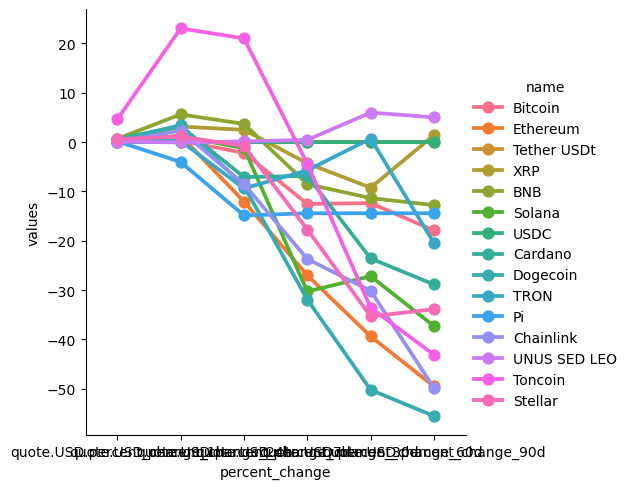

In [82]:
sns.catplot(x = 'percent_change', y = 'values', hue = 'name', data = df7, kind = 'point')


In [92]:
# the column name i.e. in x-axis is hard to see, so we change it for the ease in visualization
df7['percent_change'] = df7 ['percent_change'].replace(['quote.USD.percent_change_1h',  'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'], ['1h', '24h', '7d', '30d', '60d', '90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.01467
1,Bitcoin,24h,0.27748
2,Bitcoin,7d,-2.19517
3,Bitcoin,30d,-12.53615
4,Bitcoin,60d,-12.38205
5,Bitcoin,90d,-17.92554
6,Ethereum,1h,0.16979
7,Ethereum,24h,1.27635
8,Ethereum,7d,-12.06816
9,Ethereum,30d,-27.01382


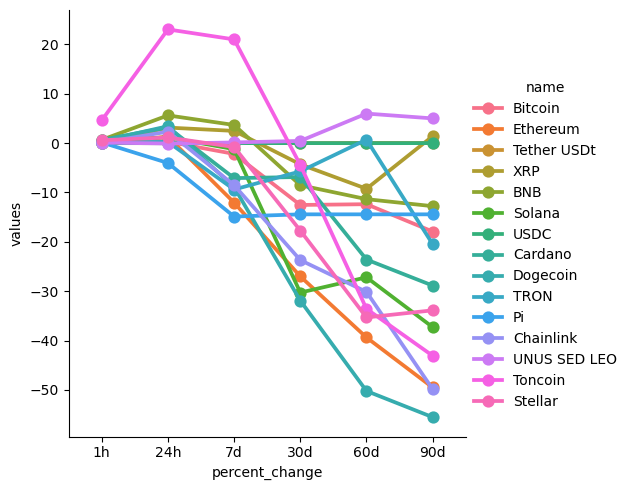

In [94]:
sns.catplot(x = 'percent_change', y = 'values', hue = 'name', data = df7, kind = 'point')
